# Operationen auf Fuzzy-Mengen
In der Zweiwertigen Logik, der Satz klar definiert ist und wahr oder falsch unterschieden werden kann, als Aussage bezeichnet. Zum Beispiel sind "Deutschland ist in Europa" und "Die Erde dreht sich nicht". Eine Aussage ist entweder wahr oder falsch. Die Aussage "P: Deutschland ist in Europa" ist wahr (wahre Aussage) mit dem Wahrheitswert T(P) = 1, während die Aussage "Q: Die Erde dreht sich nicht" falsch (falsche Aussage) ist mit dem Wahrheitswert T(Q) = 0. Die oben genannten Aussagen werden durch einfache Aussagesätze oder Atomaussagen dargestellt.

Im wirklichen Leben begegnen wir oft Aussagesätzen wie "Sie ist hübsch", "Die Drehzahl des Elektromotors ist etwas zu hoch" oder "Der Hauptstromkreis hat einen zu hohen Strom". Diese Aussagen haben die Eigenschaft, dass sie vage Konzepte wie "hübsch", "etwas zu hoch" oder "zu hoch" enthalten, die zu einer bestimmten unscharfen Menge gehören. Sie können nicht so eindeutig wie zweiwertige logische Aussagen als "wahr" oder "falsch" bewertet werden, sondern befinden sich in einem unscharfen Zustand zwischen Wahrheit und Falschheit. Mit anderen Worten, sie sind ähnlich wie den Aussagen in der Zweiwertigen Logik, sind jedoch mit einer gewissen Unschärfe versehen. Im Allgemeinen bezeichnen wir solche Aussagesätze, die Unscharflichkeit enthalten, als unscharfe Aussagen.

Die Wahrheitswerte der logischen Operatoren "∨" (Disjunktion), "∧" (Konjunktion) und "¬" (Negation) können durch die entsprechenden $t$-Conormen, $t$-Normen und Negationsoperatoren dargestellt werden.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Definieren Sie eine Fuzzy-Menge 1 namens "niedrig" mit einer Triangular-Funktion, die zwischen den Werten 2 und 6 definiert ist und ihr Maximum bei 4 hat.
2. Definieren Sie eine Fuzzy-Menge 2 namens "mittel" mit einer Triangular-Funktion, die zwischen den Werten 4 und 8 definiert ist und ihr Maximum bei 6 hat.

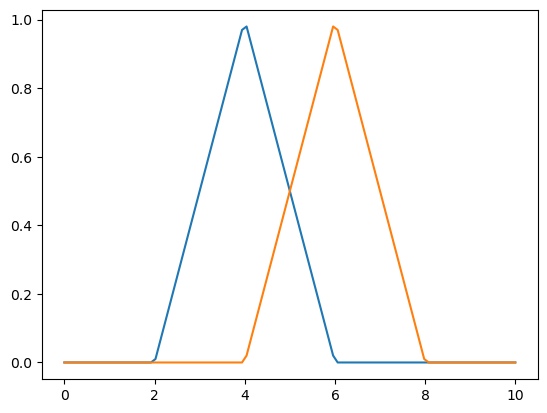

In [3]:
### Lösung ###

def triangular(x, a, b, c):
    return np.maximum(0, np.minimum((x-a)/(b-a), (c-x)/(c-b)))

x = np.linspace(0, 10, 100)
fuzzy_menge_niedrig = triangular(x,2,4,6)
fuzzy_menge_mittel = triangular(x,4,6,8)

plt.plot(x, fuzzy_menge_niedrig)
plt.plot(x, fuzzy_menge_mittel)
plt.show()

3. $t$-Norm entspricht dem Und der binären Logik. Bitte definieren Sie $t$-Norm Operationen wie folgt:

|              **UND**             | $t$-Norm $⊤(\mu_A(x), \mu_B(x))$   |
|:-------------------------------:|:-------------------------------:|
|              Minimum  |  $$\min\{\mu_A(x), \mu_B(x)\}$$ |
|    Abgeschnittene Differenz  (Lukasiewicz-UND)          |$$\max\{0, \mu_A(x)+\mu_B(x)-1\}$$  |
|       Einstein-Produkt       | $$\displaystyle \frac{\mu_A(x) \cdot \mu_B(x)}{2 - (\mu_A(x)+\mu_B(x)-\mu_A(x) \cdot \mu_B(x))}$$  |
|       Hamacher-Produkt       | $$\displaystyle \frac{\mu_A(x) \cdot \mu_B(x)}{\mu_A(x)+\mu_B(x)-\mu_A(x) \cdot \mu_B(x)}$$  |
|     Algebraisches Produkt     |      $$\mu_A(x) \cdot \mu_B(x)$$       |

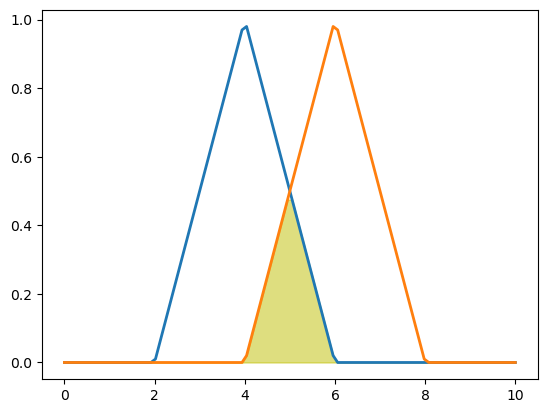

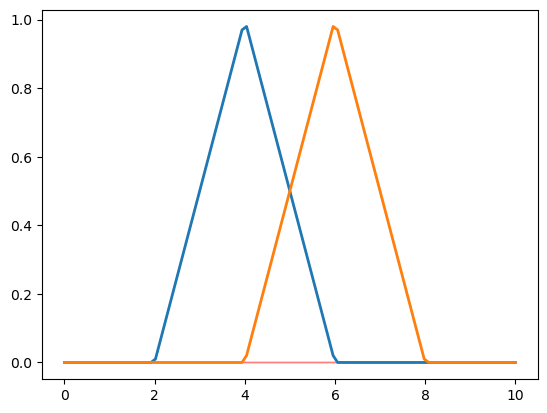

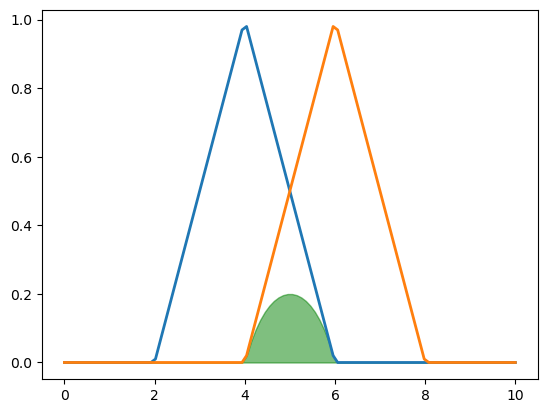

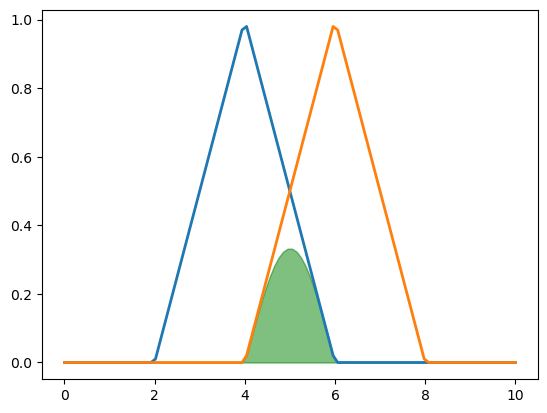

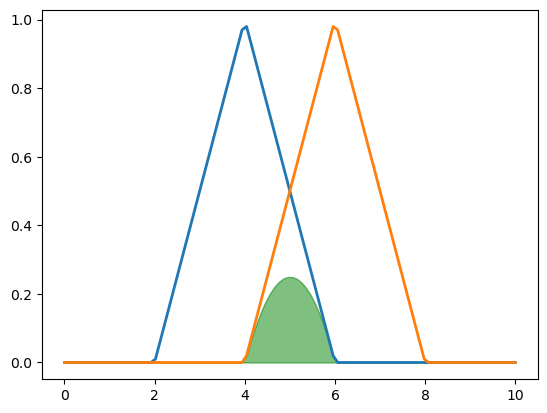

In [16]:
### Lösung ###
def Minimum(fm1, fm2):
    return np.minimum(fm1, fm2)

def Lukasiewicz_UND(fm1,fm2):
    return np.maximum(0, fm1 + fm2 -1)

def Einstein_Produkt(fm1, fm2):
    return (fm1*fm2) / (2-(fm1 + fm2 - fm1*fm2))

def Hamacher_Produkt(fm1, fm2):
    return (fm1*fm2) / ((fm1 + fm2 - fm1*fm2)+1e-3)

def Algebraisches_Produkt(fm1, fm2):
    return fm1*fm2


plt.figure()
plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
plt.plot(x, fuzzy_menge_mittel, linewidth=2)
plt.fill_between(x, Minimum(fuzzy_menge_niedrig, fuzzy_menge_mittel), color='y',alpha=.5)
plt.show()

plt.figure()
plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
plt.plot(x, fuzzy_menge_mittel, linewidth=2)
plt.fill_between(x, Lukasiewicz_UND(fuzzy_menge_niedrig,fuzzy_menge_mittel), color = 'r',alpha=.5)
plt.show()

plt.figure()
plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
plt.plot(x, fuzzy_menge_mittel, linewidth=2)
plt.fill_between(x, Einstein_Produkt(fuzzy_menge_niedrig,fuzzy_menge_mittel), color = 'g',alpha=.5)
plt.show()

plt.figure()
plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
plt.plot(x, fuzzy_menge_mittel, linewidth=2)
plt.fill_between(x, Hamacher_Produkt(fuzzy_menge_niedrig,fuzzy_menge_mittel), color = 'g',alpha=.5)
plt.show()

plt.figure()
plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
plt.plot(x, fuzzy_menge_mittel, linewidth=2)
plt.fill_between(x, Algebraisches_Produkt(fuzzy_menge_niedrig,fuzzy_menge_mittel), color = 'g',alpha=.5)
plt.show()


4. $t$-Conormen entspricht dem Order der binären Logik. Bitte definieren Sie $t$-Conormen Operationen wie folgt:

|              **ODER**             |   $t$-Conorm $⊥(\mu_A(x),\mu_B(x))$  |
|:-------------------------------:|:-------------------------------:|
|              Maximum              | $$\max\{\mu_A(x), \mu_B(x)\}$$ |
|    Abgeschnittene Summe            (Lukasiewicz-ODER)          | $$\min\{1, \mu_A(x)+\mu_B(x)\}$$  |
|       Einstein-Summe       |  $$\displaystyle \frac{\mu_A(x) + \mu_B(x)}{1 + \mu_A(x) \cdot \mu_B(x)}$$  |
|       Hamacher-Summe        |$$\displaystyle \frac{\mu_A(x) + \mu_B(x) - 2 \cdot \mu_A(x) \cdot \mu_B(x)}{1 - \mu_A(x) \cdot \mu_B(x)}$$  |
|     Algebraische Summe     | $$\mu_A(x) + \mu_B(x) - \mu_A(x) \cdot \mu_B(x)$$ |

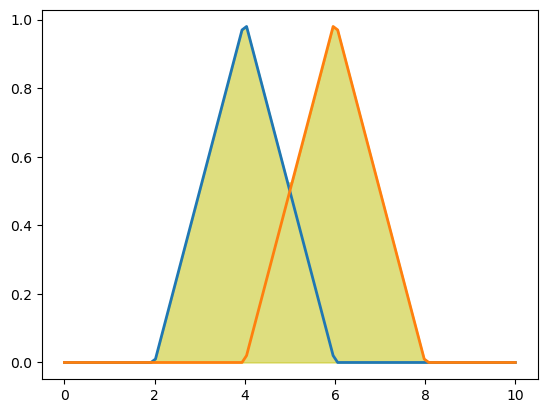

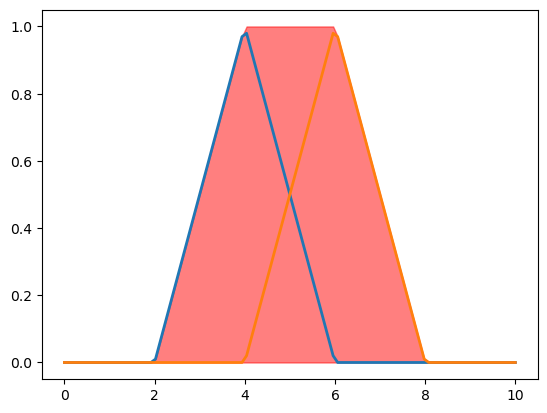

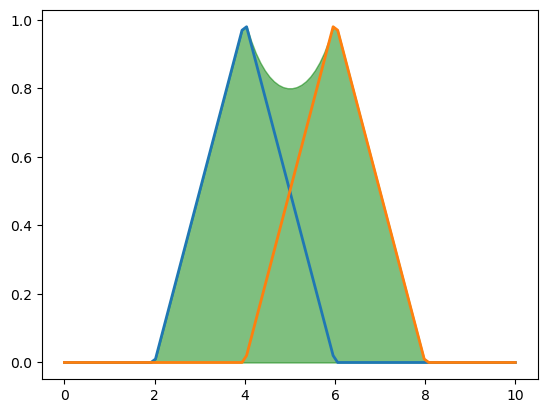

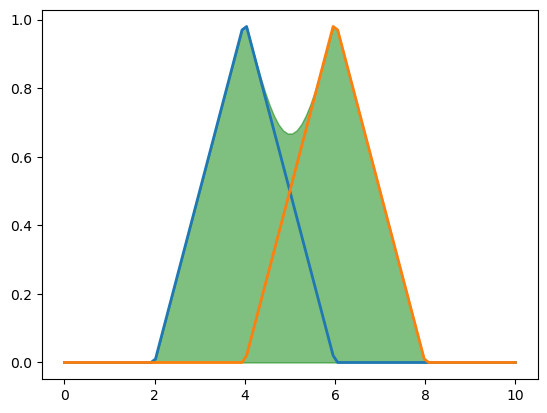

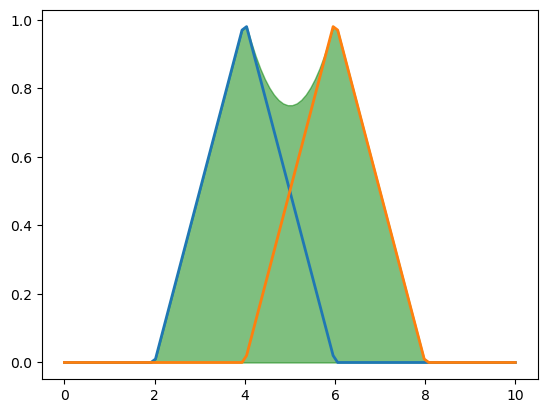

In [38]:
### Lösung ###
def Maximum(fm1, fm2):
    return np.maximum(fm1, fm2)

def Lukasiewicz_Oder(fm1,fm2):
    return np.minimum(1, fm1 + fm2)

def Einstein_Summe(fm1, fm2):
    return (fm1+fm2) / (1+(fm1 * fm2))

def Hamacher_Summe(fm1, fm2):
    return (fm1+fm2-2*fm1*fm2) / (1-fm1*fm2)

def Algebraisches_Summe(fm1, fm2):
    return fm1+fm2-fm1*fm2


plt.figure()
plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
plt.plot(x, fuzzy_menge_mittel, linewidth=2)
plt.fill_between(x, Maximum(fuzzy_menge_niedrig, fuzzy_menge_mittel), color='y',alpha=.5)
plt.show()

plt.figure()
plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
plt.plot(x, fuzzy_menge_mittel, linewidth=2)
plt.fill_between(x, Lukasiewicz_Oder(fuzzy_menge_niedrig,fuzzy_menge_mittel), color = 'r',alpha=.5)
plt.show()

plt.figure()
plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
plt.plot(x, fuzzy_menge_mittel, linewidth=2)
plt.fill_between(x, Einstein_Summe(fuzzy_menge_niedrig,fuzzy_menge_mittel), color = 'g',alpha=.5)
plt.show()

plt.figure()
plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
plt.plot(x, fuzzy_menge_mittel, linewidth=2)
plt.fill_between(x, Hamacher_Summe(fuzzy_menge_niedrig,fuzzy_menge_mittel), color = 'g',alpha=.5)
plt.show()

plt.figure()
plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
plt.plot(x, fuzzy_menge_mittel, linewidth=2)
plt.fill_between(x, Algebraisches_Summe(fuzzy_menge_niedrig,fuzzy_menge_mittel), color = 'g',alpha=.5)
plt.show()

#subplt kann man die plot in eine gemeinsame Bild zeigen

5. Plotten Sie die vorher definierte Fuzzy-Mengen und die daruas resultierenden $t$-Norm und $t$-Conorm

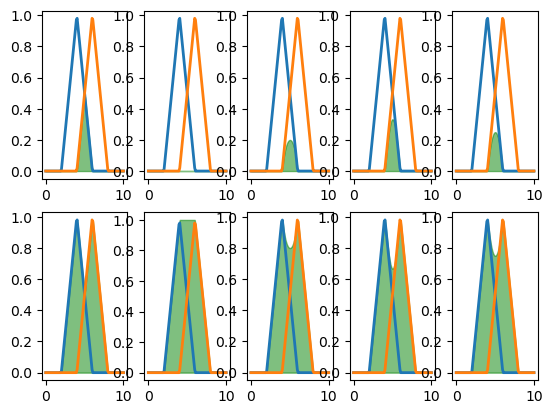

In [39]:
### Lösung ###
func_list= [Minimum, Lukasiewicz_UND, Einstein_Produkt,Hamacher_Produkt,Algebraisches_Produkt,Maximum,Lukasiewicz_Oder,Einstein_Summe,Hamacher_Summe,Algebraisches_Summe]
plt.figure()
for i, func_ in enumerate(func_list):
    plt.subplot(2,5,i+1)
    plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
    plt.plot(x, fuzzy_menge_mittel, linewidth=2)
    plt.fill_between(x, func_(fuzzy_menge_niedrig,fuzzy_menge_mittel), color = 'g',alpha=.5)
    
plt.show()

6. Negation entspricht dem Nicht der binären Logik. Bitte definieren Sie Negation von fuzzy_mengen_1 und fuzzy_mengen_2:
- a → 1 − a

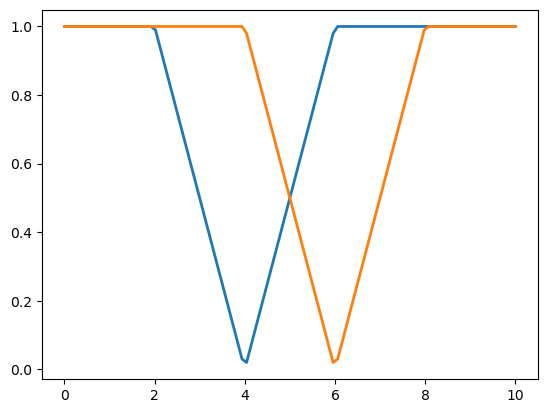

In [40]:
### Lösung ###
nicht_fm1 = 1-fuzzy_menge_niedrig
nicht_fm2 = 1-fuzzy_menge_mittel

plt.figure()
plt.plot(x, nicht_fm1, linewidth=2)
plt.plot(x, nicht_fm2, linewidth=2)
plt.show()

7. Demonstration der Beziehung zwischen $t$-Norm und $t$-Conormen durch Visualisierung
 - ⊥(a, b) = 1 − ⊤(1 − a, 1 − b)
 - ⊤(a, b) = 1 − ⊥(1 − a, 1 − b)

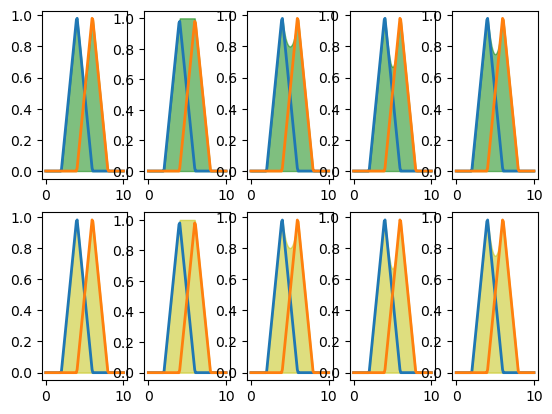

/var/folders/hj/lb6g98tx3mvfbrszwdj20rmr0000gn/T/ipykernel_1186/949724201.py:12: RuntimeWarning: invalid value encountered in divide
  return (fm1+fm2-2*fm1*fm2) / (1-fm1*fm2)


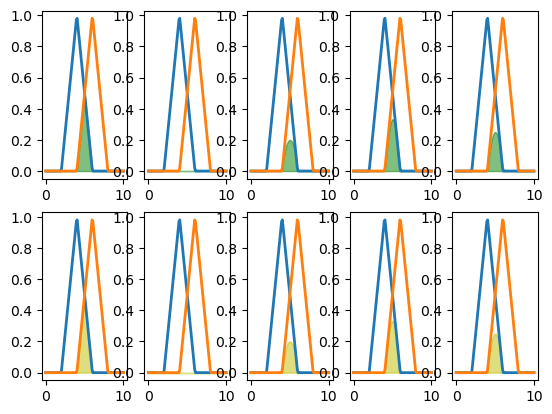

In [45]:
### Lösung ###
def Und(fm1, fm2, oder):
    return 1 - oder((1 - fm1), (1-fm2))

def Oder(fm1, fm2, und):
    return 1 - und((1-fm1), (1 - fm2))

plt.figure()
und_list = [Minimum, Lukasiewicz_UND, Einstein_Produkt,Hamacher_Produkt,Algebraisches_Produkt]
oder_list = [Maximum,Lukasiewicz_Oder,Einstein_Summe,Hamacher_Summe,Algebraisches_Summe]

for i, func in enumerate(und_list):
    oder = Oder(fuzzy_menge_niedrig,fuzzy_menge_mittel,func)
    plt.subplot(2,5,i+1)
    plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
    plt.plot(x, fuzzy_menge_mittel, linewidth=2)
    plt.fill_between(x, oder_list[i](fuzzy_menge_niedrig,fuzzy_menge_mittel), color = 'g',alpha=.5)
    plt.subplot(2,5,i+6)
    plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
    plt.plot(x, fuzzy_menge_mittel, linewidth=2)
    plt.fill_between(x, oder, color = 'y',alpha=.5)

plt.show()

for i, func in enumerate(oder_list):
    und = Und(fuzzy_menge_niedrig,fuzzy_menge_mittel,func)
    plt.subplot(2,5,i+1)
    plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
    plt.plot(x, fuzzy_menge_mittel, linewidth=2)
    plt.fill_between(x, und_list[i](fuzzy_menge_niedrig,fuzzy_menge_mittel), color = 'g',alpha=.5)
    plt.subplot(2,5,i+6)
    plt.plot(x, fuzzy_menge_niedrig, linewidth=2)
    plt.plot(x, fuzzy_menge_mittel, linewidth=2)
    plt.fill_between(x, und, color = 'y',alpha=.5)
    
plt.show()

# Fuzzy-Implikation
Die Bedeutung des Symbols "→" ist "Implikation" oder "Folgerung" und entspricht dem Symbol "⊂" in der klassischen Mengenlehre. Es zeigt an, dass aus einer Aussage eine andere abgeleitet werden kann und wird in der Form "Wenn...dann..." verwendet.

In der formalen Logik wird die zusammengesetzte Aussage "P→Q", die durch den logischen Operator "Implikation →" verbunden ist, auch als Konditionalaussage oder Bedingungsaussage bezeichnet. Die zusammengesetzte unscharfe Aussage "P→Q", die durch den logischen Operator "Implikation →" verbunden ist, wird als Konditionalunscharfe Aussage oder Bedingungsunscharfe Aussage bezeichnet.

- Fuzzy-Relationen

In der zweiwertigen Welt verwenden wir "p→q", um die Beziehung zwischen zwei Aussagen darzustellen. Eine Aussage kann entweder wahr oder falsch sein.
In der unscharfen Welt kann dieselbe Beziehung zwischen zwei unscharfen Aussagen durch "p→q" ausgedrückt werden. Die Werte unscharfer Aussagen nicht einfach "wahr" oder "falsch" sind. Aber spiegeln sie den Grad der Wahrheit oder Falschheit wider und passen besser zum menschlichen Denken als Aussagen in der Zweiwertigen Logik. 

- Operatoren für Fuzzy-Implikation

Für die unscharfe Aussage, "P→Q" ist eine unscharfe Implikation, und der Ausdruck ihres Wahrheitswertes wird als Fizzy Implikationsoperator bezeichnet.

## Operatoren für Fuzzy-Implikation
1. Bitte implementieren Sie den folgenden Fuzzy-Implikationsoperator:

| Bezeichnung                 | Fuzzy-Implikation                                       |
|----------------------------|---------------------------------------------------------|
| Mamdani-Implikation        | $$\min\{\mu_A(x), \mu_B(y)\}$$                            |
| algebraisches Produkt      | $$\mu_A(x) \cdot \mu_B(y)$$                               |
| Zadeh-Implikation          | $$\max\{ \min \{\mu_A(x), \mu_B(y)\}, 1 - \mu_A(x)\}$$     |
| Lukasiewicz-Implikation    | $$\min\{1, 1- \mu_A(x) + \mu_B(y)\}$$                      |
| Kleene-Dienes-Implikation  | $$\max\{ 1 - \mu_A(x), \mu_B(y)\}$$                        |
| Gödel-Implikation          | Wenn $\mu_A(x) < \mu_B(y)$, dann $1$; sonst $\mu_B(y)$   |
| Sharp-Implikation          | Wenn $\mu_A(x) < \mu_B(y)$, dann $1$; sonst $0$         |

In [8]:
### Lösung ###

2. Veranschaulichen das Ergebnis der Implikationsoperatoren mit einem 3D-Plot 

> Siehe: [np.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

> [3D Surface plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html)

In [9]:
### Lösung ###